# Create Matplotlib graph to plot Lennard-Jones potentials vs intermolecular range from Lennard-Jones parameters

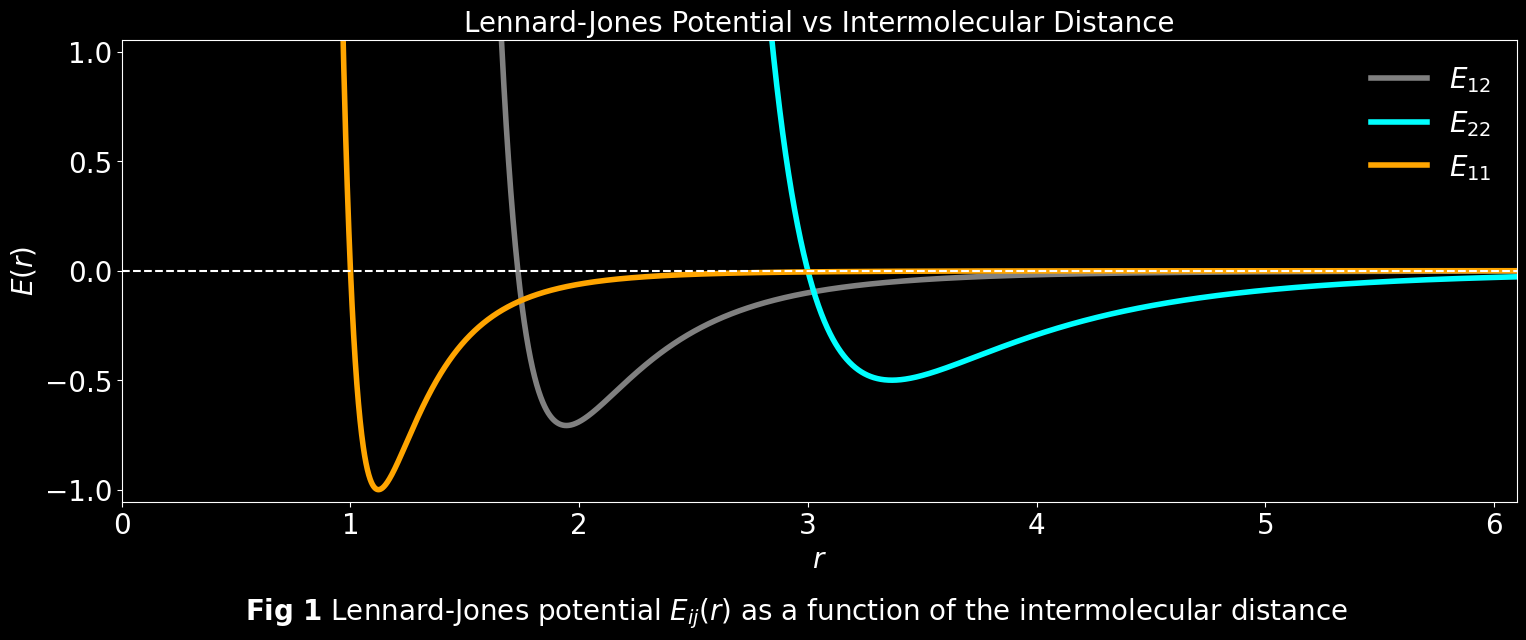

In [1]:
import lammps_logfile
import numpy as numpy
from numpy import ndarray
from typing import List
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot

r = numpy.arange(0.5, 10, 0.001)
sigma_11 = 1.0
epsilon_11 = 1.0
sigma_22 = 3.0
epsilon_22 = 0.5

sigma_12 = numpy.sqrt(sigma_11*sigma_22)
epsilon_12 = numpy.sqrt(epsilon_11*epsilon_22)

lj_potential_11 = 4*epsilon_11*((sigma_11/r)**12-(sigma_11/r)**6)
lj_potential_22 = 4*epsilon_22*((sigma_22/r)**12-(sigma_22/r)**6)
lj_potential_12 = 4*epsilon_12*((sigma_12/r)**12-(sigma_12/r)**6)

# Set up the line graph
lj_potential_line_graph_figure, lj_potential_line_graph_axes = pyplot.subplots(figsize=(18, 6))
lj_potential_line_graph_figure.patch.set_facecolor('black')
lj_potential_line_graph_axes.set_facecolor('black')

# Stylise ticks and spines
lj_potential_line_graph_axes.tick_params(colors='white', which='both', labelsize=20)
for spine in lj_potential_line_graph_axes.spines.values():
    spine.set_edgecolor('white')

# Plot the data
lj_potential_line_graph_axes.plot(r, lj_potential_12, color='gray', linewidth=4, label=r'$E_{12}$')
lj_potential_line_graph_axes.plot(r, lj_potential_22, color='cyan', linewidth=4, label=r'$E_{22}$')
lj_potential_line_graph_axes.plot(r, lj_potential_11, color='orange', linewidth=4, label=r'$E_{11}$')

# Add dashed line at y=0
lj_potential_line_graph_axes.axhline(0, color='white', linestyle='--', linewidth=1.5)

# Set axes labels, limits and graph title
lj_potential_line_graph_axes.set_xlabel(r'$r$', fontsize=20, color='white')
lj_potential_line_graph_axes.set_ylabel(r'$E(r)$', fontsize=20, color='white')
lj_potential_line_graph_axes.set_xticks(numpy.arange(0, 6.1, 1))
lj_potential_line_graph_axes.set_xlim(0, 6.1)
lj_potential_line_graph_axes.set_yticks(numpy.arange(-1., 1.25, 0.5))
lj_potential_line_graph_axes.set_ylim(-1.055, 1.055)
lj_potential_line_graph_axes.set_title('Lennard-Jones Potential vs Intermolecular Distance', fontsize=20, color='white')

# Add legend
lj_potential_legend: Legend = lj_potential_line_graph_axes.legend(loc='upper right', frameon=False, fontsize=20)
for text in lj_potential_legend.get_texts():
    text.set_color('white')

# Add figure title
lj_potential_line_graph_figure.text(0.5, -0.075,
                r'$\bf{Fig\ 1}$ Lennard-Jones potential $E_{ij}(r)$ as a function of the intermolecular distance',
                ha='center', va='center', color='white', fontsize=20)

# Display the plot
pyplot.savefig('../reports/figures/lennard_jones_potential.png', bbox_inches='tight')
pyplot.show()

# Extract timestep, potential energy & kinetic energy for energy minimization & molecular dynamics simulation from `first-input-log.lammps`

In [2]:
# Extract first-input-log.lammps log file data & instantiate lammps_logfile.File object
log_file: lammps_logfile.File = lammps_logfile.File('../logs/first-input-log.lammps')
timestep: float = 0.005
pe_vs_time: List[ndarray] = []
ke_vs_time: List[ndarray] = []

# Extract timestep, potential energy & kinetic energy for energy minimization run from lammps_logfile.File object
energy_min_time: ndarray = log_file.get("Step", run_num=0) * timestep
energy_min_potential_energy: ndarray = log_file.get("PotEng", run_num=0)
energy_min_kinetic_energy: ndarray = log_file.get("KinEng", run_num=0)

# Extract timestep, potential energy & kinetic energy for molecular dynamics run from lammps_logfile.File object
molecular_dynamics_time: ndarray = log_file.get("Step", run_num=1) * timestep
molecular_dynamics_potential_energy: ndarray = log_file.get("PotEng", run_num=1)
molecular_dynamics_kinetic_energy: ndarray = log_file.get("KinEng", run_num=1)

# Create Matplotlib graph to plot potential energy vs time for energy minimization & molecular dynamics simulation

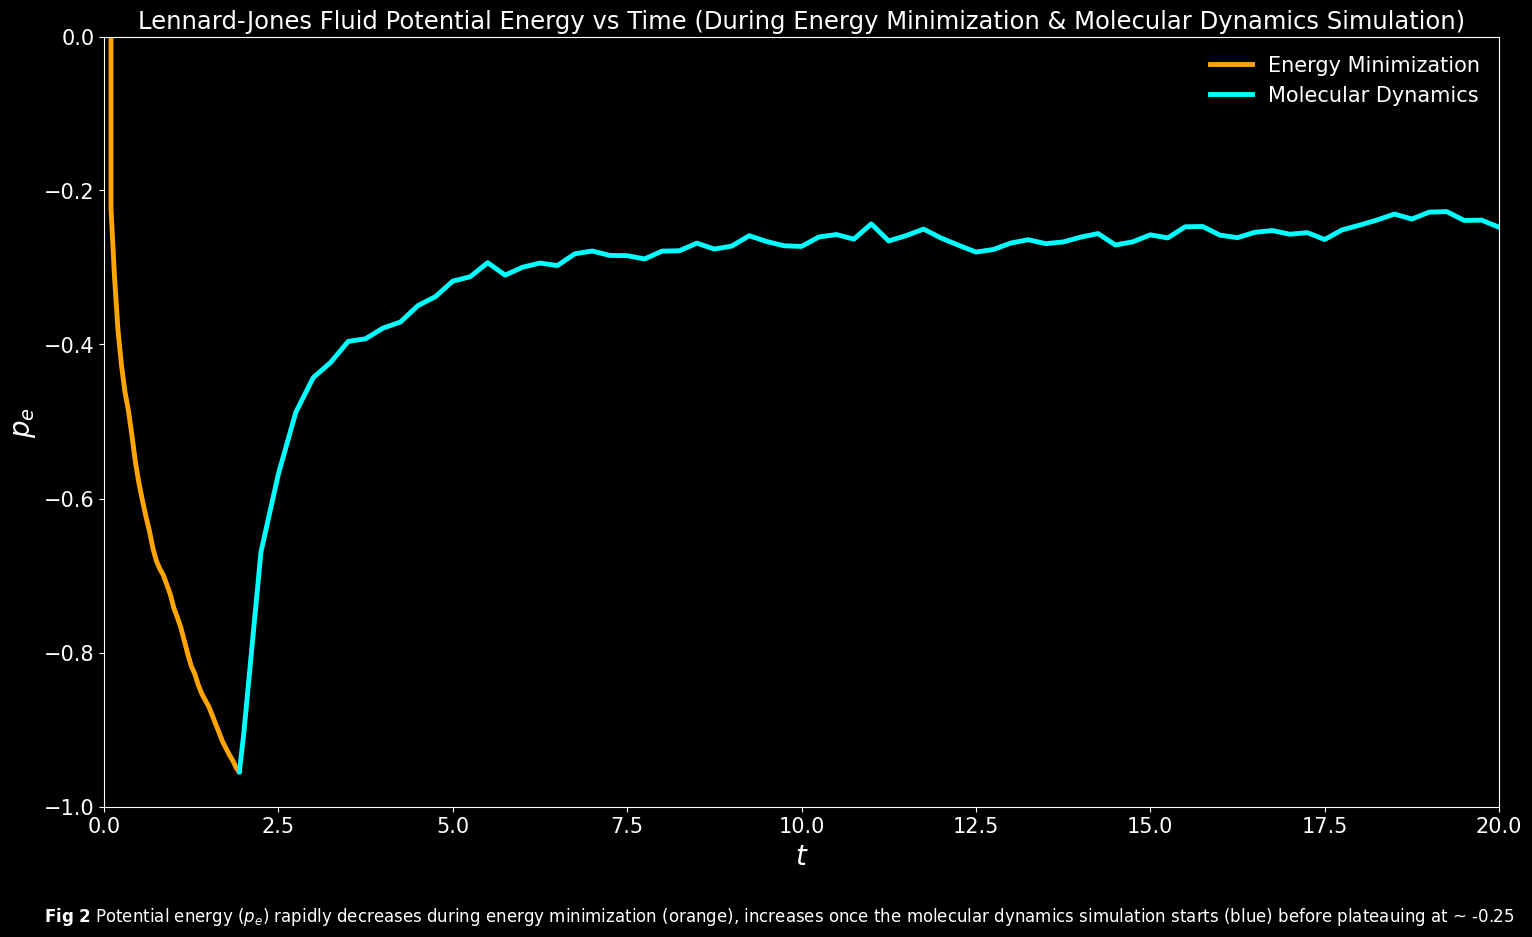

In [3]:
# Set up the line graph
pe_vs_time_line_graph_figure, pe_vs_time_line_graph_axes = pyplot.subplots(figsize=(18, 10))
pe_vs_time_line_graph_figure.patch.set_facecolor('black')
pe_vs_time_line_graph_axes.set_facecolor('black')

# Stylise ticks and spines
pe_vs_time_line_graph_axes.tick_params(colors='white', which='both', labelsize=15)
for spine in pe_vs_time_line_graph_axes.spines.values():
    spine.set_edgecolor('white')

# Plot the data
pe_vs_time_line_graph_axes.plot(energy_min_time, energy_min_potential_energy, color='orange', 
                                linewidth=3.5, label=r'Energy Minimization')
pe_vs_time_line_graph_axes.plot(molecular_dynamics_time, molecular_dynamics_potential_energy, color='cyan', 
                                linewidth=3.5, label=r'Molecular Dynamics')

# Set axes labels, limits and graph title
pe_vs_time_line_graph_axes.set_xlabel(r'$t$', color='white', fontsize=20)
pe_vs_time_line_graph_axes.set_ylabel(r'$p_{e}$', color='white', fontsize=20)
pe_vs_time_line_graph_axes.set_xlim(0, 20)
pe_vs_time_line_graph_axes.set_ylim(-1.0, 0.0)
pe_vs_time_line_graph_axes.set_title('Lennard-Jones Fluid Potential Energy vs Time (During Energy Minimization & Molecular Dynamics Simulation)', 
                                     fontsize=17.5, color='white')

# Add legend
pe_vs_time_legend: Legend = pe_vs_time_line_graph_axes.legend(loc='upper right', frameon=False, fontsize=15)
for text in pe_vs_time_legend.get_texts():
    text.set_color('white')

# Add figure title
pe_vs_time_line_graph_figure.text(0.5, 0.0005,
                r'$\bf{Fig\ 2}$ Potential energy ($p_{e}$) rapidly decreases during energy minimization (orange), '
                r'increases once the molecular dynamics simulation starts (blue) before plateauing at ~ -0.25',
                ha='center', va='center', color='white', fontsize=12)

# Display the plot
pyplot.savefig('../reports/figures/potential_energy_vs_time.png', bbox_inches='tight')
pyplot.show()

# Create Matplotlib graph to plot kinetic energy vs time for energy minimization & molecular dynamics simulation

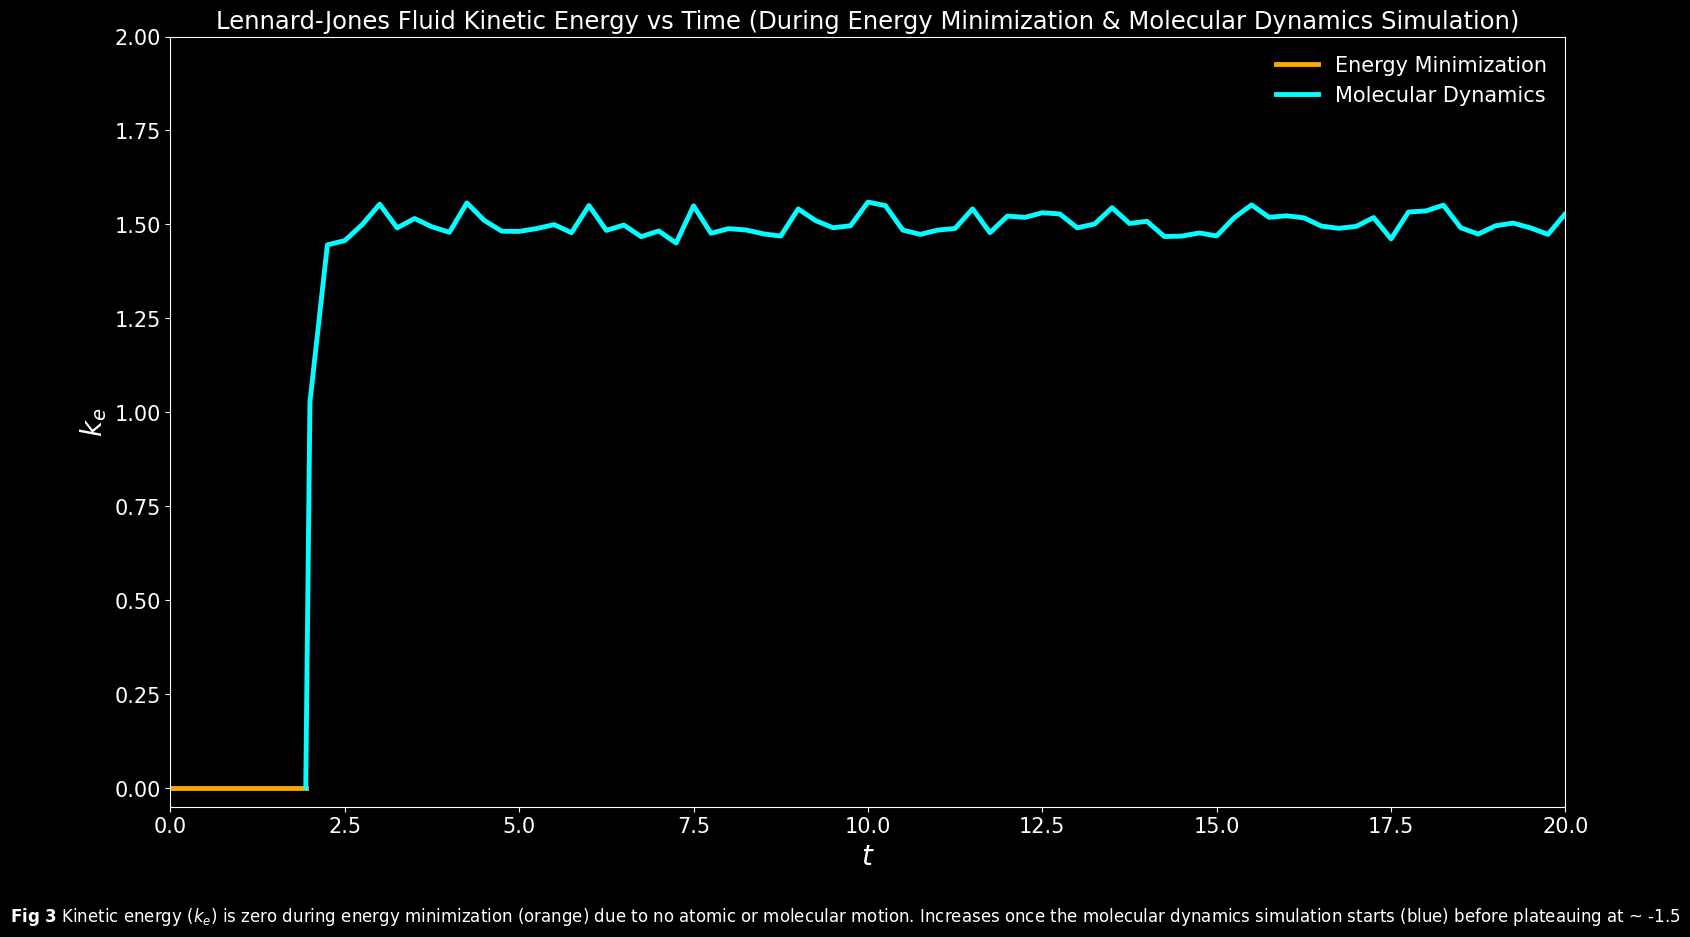

In [4]:
# Set up the line graph
ke_vs_time_line_graph_figure, ke_vs_time_line_graph_axes = pyplot.subplots(figsize=(18, 10))
ke_vs_time_line_graph_figure.patch.set_facecolor('black')
ke_vs_time_line_graph_axes.set_facecolor('black')

# Stylise ticks and spines
ke_vs_time_line_graph_axes.tick_params(colors='white', which='both', labelsize=15)
for spine in ke_vs_time_line_graph_axes.spines.values():
    spine.set_edgecolor('white')

# Plot the data
ke_vs_time_line_graph_axes.plot(energy_min_time, energy_min_kinetic_energy, color='orange', 
                                linewidth=3.5, label=r'Energy Minimization')
ke_vs_time_line_graph_axes.plot(molecular_dynamics_time, molecular_dynamics_kinetic_energy, color='cyan', 
                                linewidth=3.5, label=r'Molecular Dynamics')

# Set axes labels, limits and graph title
ke_vs_time_line_graph_axes.set_xlabel(r'$t$', color='white', fontsize=20)
ke_vs_time_line_graph_axes.set_ylabel(r'$k_{e}$', color='white', fontsize=20)
ke_vs_time_line_graph_axes.set_xlim(0, 20)
ke_vs_time_line_graph_axes.set_ylim(-0.05, 2.0)
ke_vs_time_line_graph_axes.set_title('Lennard-Jones Fluid Kinetic Energy vs Time (During Energy Minimization & Molecular Dynamics Simulation)', 
                                     fontsize=17.5, color='white')

# Add legend
ke_vs_time_legend: Legend = ke_vs_time_line_graph_axes.legend(loc='upper right', frameon=False, fontsize=15)
for text in ke_vs_time_legend.get_texts():
    text.set_color('white')

# Add figure title
ke_vs_time_line_graph_figure.text(0.5, 0.0005,
                r'$\bf{Fig\ 3}$ Kinetic energy ($k_{e}$) is zero during energy minimization (orange) due to no '
                r'atomic or molecular motion. Increases once the molecular dynamics simulation starts (blue) '
                r'before plateauing at ~ -1.5',
                ha='center', va='center', color='white', fontsize=12)

# Display the plot
pyplot.savefig('../reports/figures/kinetic_energy_vs_time.png', bbox_inches='tight')
pyplot.show()